In [1]:
import numpy as np
import matplotlib.pyplot as plt

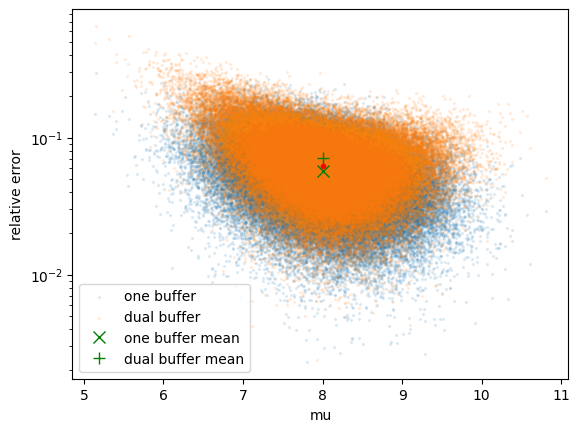

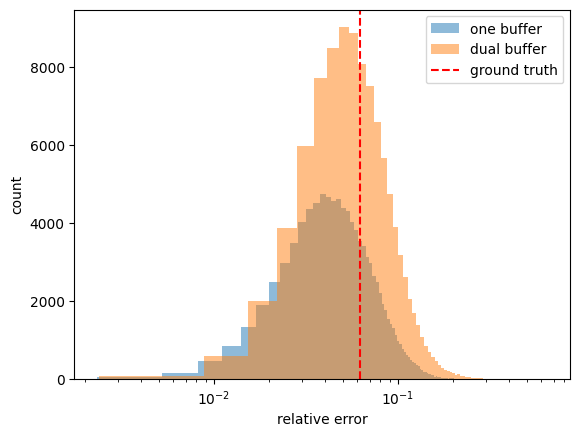

Underestimate rate: one buffer = 0.64, dual buffer = 0.49


In [8]:
""" This example shows that using the same batch of samples to train and evaluate the model can lead to underestimation of the error.
In this toy setting, we are going to estimate mean and relative variance of a Gaussian distribution, using two strategies:
1. One buffer: use the same batch of samples to estimate both mean and variance.
2. Dual buffer: use the first batch of samples to estimate the mean and the second batch to estimate the variance using the estimated mean from the first batch.
It turns out that the one buffer strategy underestimates the error more often than the dual buffer strategy.
"""

mu_gt, std_gt = 8, 2
Xa = np.random.normal(mu_gt, std_gt, (10, 100000))
Xb = np.random.normal(mu_gt, std_gt, (10, 100000))
mu = np.mean(Xa, axis=0)
err1 = np.mean((Xa - mu)**2, axis=0)/mu**2
err2 = np.mean((Xb - mu)**2, axis=0)/mu**2
err_gt = (std_gt/mu_gt)**2
plt.figure()
plt.scatter(mu, err1, s=2, alpha=0.1, label='one buffer')
plt.scatter(mu, err2, s=2, alpha=0.1, label='dual buffer')
plt.plot(mu.mean(), err1.mean(), 'gx', markersize=8, label='one buffer mean')
plt.plot(mu.mean(), err2.mean(), 'g+', markersize=8, label='dual buffer mean')
plt.plot(mu_gt, err_gt, 'ro', markersize=3)
plt.xlabel('mu')
plt.ylabel('relative error')
plt.yscale('log')
plt.legend()
plt.show()

plt.figure()
plt.hist(err1, bins=100, alpha=0.5, label='one buffer')
plt.hist(err2, bins=100, alpha=0.5, label='dual buffer')
plt.axvline(err_gt, color='red', linestyle='--', label='ground truth')
plt.xlabel('relative error')
plt.ylabel('count')
plt.xscale('log')
plt.legend()
plt.show()
underestimate_rate1 = np.mean(err1 < err_gt)
underestimate_rate2 = np.mean(err2 < err_gt)
print(f"Underestimate rate: one buffer = {underestimate_rate1:.2f}, dual buffer = {underestimate_rate2:.2f}")